## Use Case - Victoria

### Background

The Dataset provides living area and conservation status.
There are 218 observations and 16 variables.

### Objective
Create a python script for the Use Case below, please upload the script after you finish.
The Problem is to determine the best model and give the reason.

### Case Study
Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level, A = 1A, B = 2A, C = 2B and 3A.

### Instructions
Download the dataset as a CSV file and place it in your current working directory with the filename "victoria.csv".

1. Import Dataset: Load the dataset.
2. Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)
3. Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.
4. Variable Selection: Choose the variable and its reason.
5. Modelling: Create models using Regression
6. Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [119]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [120]:
# import all libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [121]:
housing_df = pd.read_csv("victoria.csv", sep=";")
housing_df.shape

(218, 16)

In [122]:
housing_df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [123]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
row.labels        218 non-null int64
totalprice        218 non-null float64
area              218 non-null float64
zone              218 non-null object
category          218 non-null object
age               218 non-null int64
floor             218 non-null int64
rooms             218 non-null int64
out               218 non-null object
conservation      218 non-null object
toilets           218 non-null int64
garage            218 non-null int64
elevator          218 non-null int64
streetcategory    218 non-null object
heating           218 non-null object
tras              218 non-null int64
dtypes: float64(2), int64(8), object(6)
memory usage: 27.4+ KB


In [124]:
housing_df.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,row.labels,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,280741.523853,5.718657e+09,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,69298.459358,3.455007e+09,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,155000.000000,5.300000e+01,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
10%,22.700000,202800.000000,1.005800e+09,8.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,228500.000000,1.187250e+09,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,269750.000000,7.118500e+09,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,328625.000000,8.542750e+09,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
90%,196.300000,378450.000000,9.325500e+09,35.000000,7.300000,6.000000,2.000000,1.000000,1.000000,1.000000
99%,215.830000,456660.000000,9.954490e+09,90.280000,11.830000,6.000000,2.000000,1.000000,1.000000,1.000000


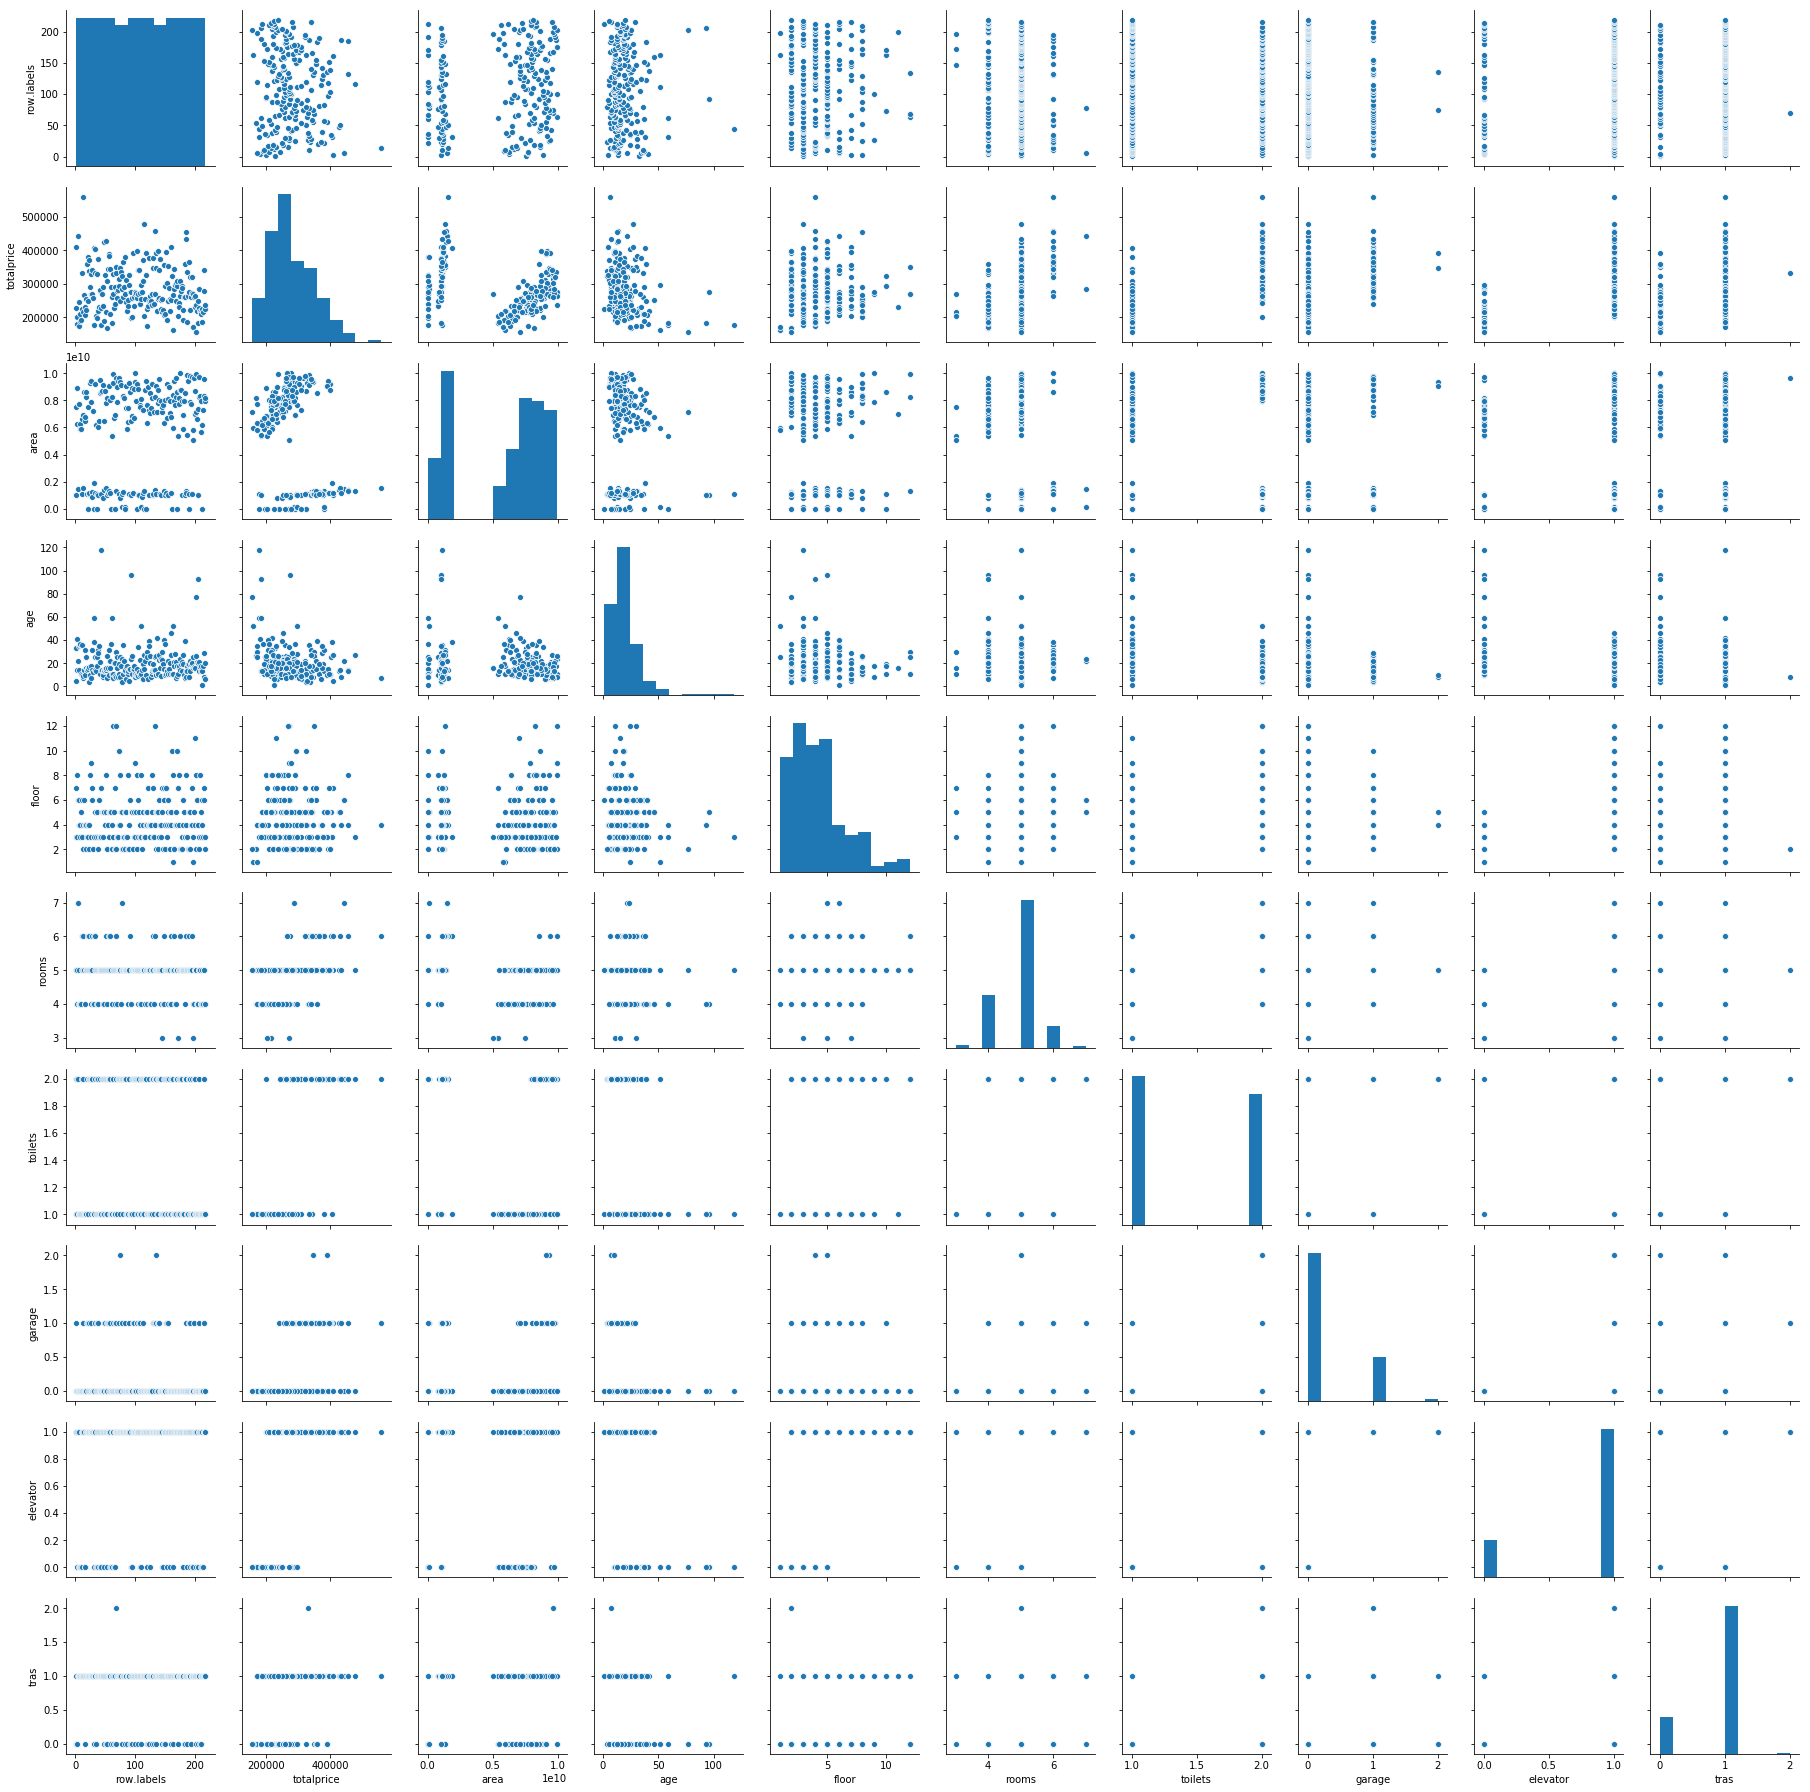

In [125]:
sns.pairplot(data = housing_df)

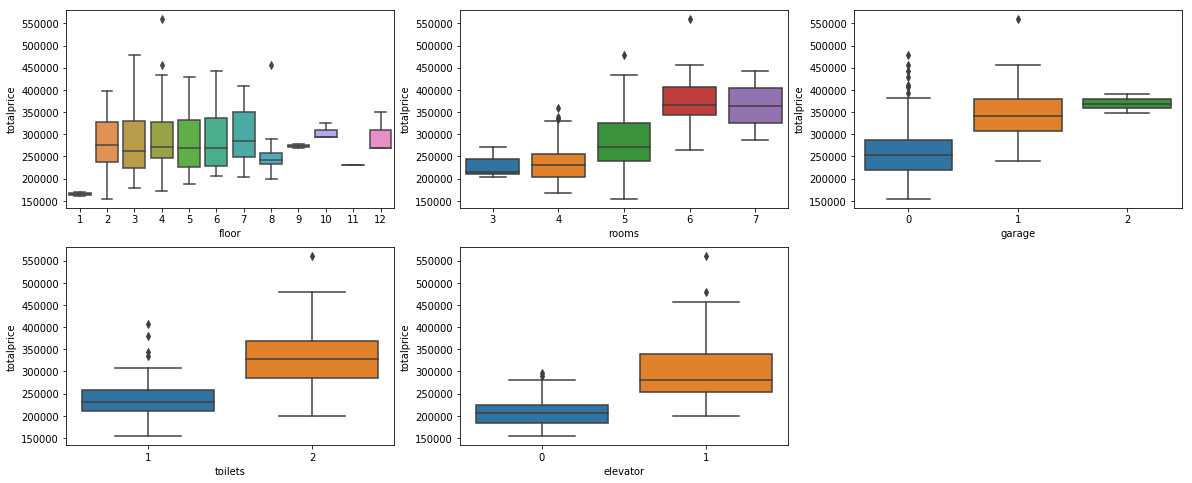

In [126]:
#categorical variables
plt.figure(figsize = (20,8))

plt.subplot(2,3,1)
sns.boxplot(x ='floor', y = 'totalprice', data = housing_df)
plt.subplot(2,3,2)
sns.boxplot(x ='rooms', y = 'totalprice', data = housing_df)
plt.subplot(2,3,3)
sns.boxplot(x ='garage', y = 'totalprice', data = housing_df)
plt.subplot(2,3,4)
sns.boxplot(x ='toilets', y = 'totalprice', data = housing_df)
plt.subplot(2,3,5)
sns.boxplot(x ='elevator', y = 'totalprice', data = housing_df)

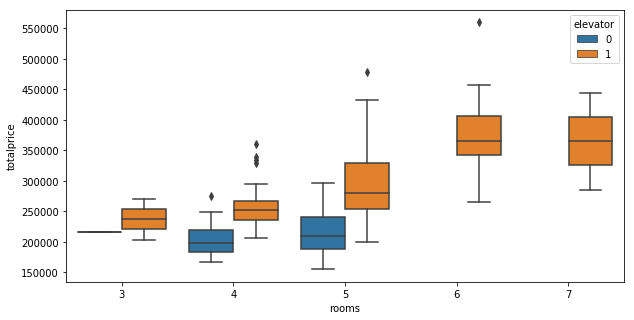

In [127]:
plt.figure(figsize = (10,5))
sns.boxplot(x ='rooms', y = 'totalprice', hue = 'elevator',data = housing_df)

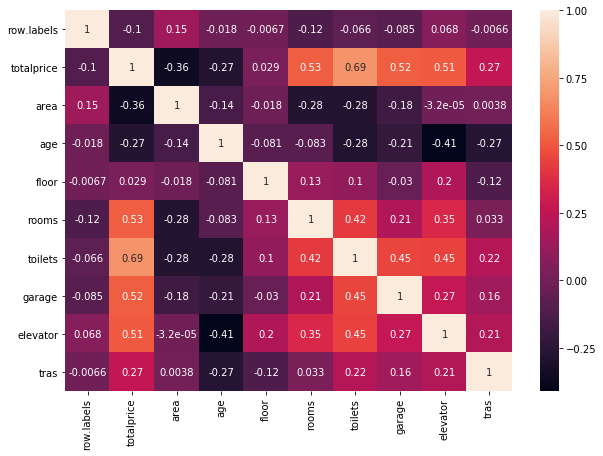

In [128]:
plt.figure(figsize=(10,7))
sns.heatmap(housing_df.corr(),annot = True)

We see high correlation between totalprice, toilet, garage, and elevator.

### Data Preparation

In [129]:
housing_df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000.0,7.531000e+09,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000.0,1.006500e+09,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000.0,8.887000e+09,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000.0,6.261000e+09,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600.0,1.461500e+09,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [130]:
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [131]:
df_train.shape

(152, 16)

In [132]:
scaler = MinMaxScaler()

#applying the scaler only to below variables
num_var= ['totalprice', 'toilets', 'garage', 'elevator']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [133]:
df_train.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
134,135,0.476543,1.124700e+09,Z43,3A,26,2,5,E50,1A,1.0,0.5,1.0,S4,3B,1
197,198,0.038272,5.828000e+09,Z62,4B,25,1,4,E100,2B,0.0,0.0,0.0,S3,3A,1
40,41,0.303704,8.554000e+09,Z41,3A,11,3,5,E100,1A,1.0,0.0,1.0,S2,3A,1
154,155,0.492840,1.006400e+09,Z36,2B,22,6,5,E100,1A,1.0,0.5,1.0,S2,3A,1
190,191,0.301235,8.100000e+01,Z52,3B,8,5,5,E100,1A,1.0,0.0,1.0,S3,3A,1


In [134]:
df_train.describe()

,row.labels,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,107.368421,0.320912,5.610090e+09,20.500000,4.388158,4.901316,0.493421,0.134868,0.796053,0.828947
std,63.100119,0.179701,3.437158e+09,15.902018,2.093982,0.648583,0.501609,0.229961,0.404262,0.394940
min,1.000000,0.000000,5.900000e+01,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,53.500000,0.187037,1.188150e+09,11.000000,3.000000,5.000000,0.000000,0.000000,1.000000,1.000000
50%,105.000000,0.283951,7.080500e+09,16.000000,4.000000,5.000000,0.000000,0.000000,1.000000,1.000000
75%,161.250000,0.445679,8.553250e+09,23.000000,5.000000,5.000000,1.000000,0.500000,1.000000,1.000000
max,218.000000,1.000000,9.992000e+09,118.000000,12.000000,7.000000,1.000000,1.000000,1.000000,2.000000


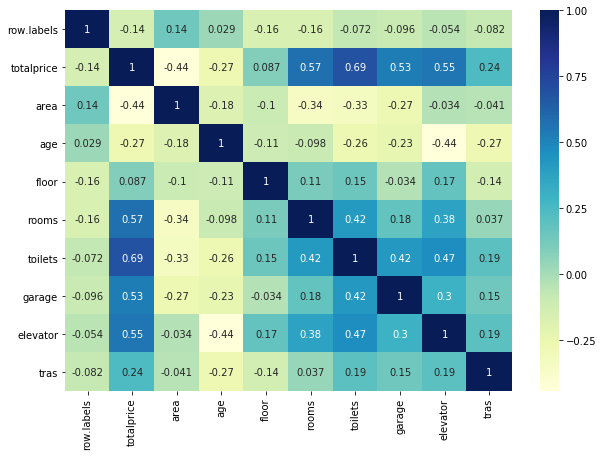

In [135]:
# let us check the correlation of train data
plt.figure(figsize = (10,7))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')

In [136]:
y_train = df_train.pop('totalprice')
X_train = df_train

### Data Modelling

In [137]:
import statsmodels.api as sm

In [138]:
X_train.columns

Index(['row.labels', 'area', 'zone', 'category', 'age', 'floor', 'rooms',
       'out', 'conservation', 'toilets', 'garage', 'elevator',
       'streetcategory', 'heating', 'tras'],
      dtype='object')

In [139]:
X = X_train.drop(['zone','category','streetcategory','heating','out','conservation'],axis =1)

In [140]:
X.columns

Index(['row.labels', 'area', 'age', 'floor', 'rooms', 'toilets', 'garage',
       'elevator', 'tras'],
      dtype='object')

In [141]:
#X_train_sm = sm.add_constant(X_train[['garage','toilets','elevator']]) 
X_train_sm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_sm).fit()

In [142]:
lr_1.params

const        -1.263797e-01
row.labels   -4.228254e-05
area         -1.005016e-11
age          -4.018731e-04
floor        -2.890885e-03
rooms         7.108958e-02
toilets       1.102689e-01
garage        1.679485e-01
elevator      9.559256e-02
tras          3.323360e-02
dtype: float64

In [143]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             totalprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     37.24
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.65e-33
Time:                        16:49:08   Log-Likelihood:                 137.83
No. Observations:                 152   AIC:                            -255.7
Df Residuals:                     142   BIC:                            -225.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1264      0.090     -1.411      0.1

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif = pd.DataFrame()
vif["Fitur"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]  = round(vif["VIF"], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Fitur,VIF
4,rooms,25.22
7,elevator,8.09
3,floor,5.61
8,tras,5.55
1,area,4.06
0,row.labels,3.83
2,age,3.43
5,toilets,3.30
6,garage,1.76


Kita drop `row.labels`, `tras`, `floor`, dan`age`  karena terlihat sangat insignifikan terhadap model, dimana nilai *p-value*nya mencapai 0.755, 0.142, 0.493, dan 0.520 secara berturut-turut

In [146]:
X = X.drop(['row.labels', 'tras','floor','age'], axis =1)

In [147]:
X_sm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_sm).fit()

In [148]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             totalprice   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     66.09
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           8.90e-36
Time:                        16:49:08   Log-Likelihood:                 135.62
No. Observations:                 152   AIC:                            -259.2
Df Residuals:                     146   BIC:                            -241.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.075     -1.749      0.0

In [149]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,rooms,8.31
4,elevator,7.00
0,area,3.68
2,toilets,3.19
3,garage,1.71


Sebelum dilanjutkan kita drop terlebih dahulu kolom `area` dan `rooms` karena membuat model kita memiliki kemungkinan multikolinearitas yang cukup tinggi meskipun nilai *p-value*nya dapat diterima (berdasarkan **warnings** dari summary model kita).

In [150]:
X = X.drop(['area','rooms'], axis =1)

In [151]:
X_sm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_sm).fit()

In [152]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             totalprice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     72.41
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           7.03e-29
Time:                        16:49:09   Log-Likelihood:                 114.38
No. Observations:                 152   AIC:                            -220.8
Df Residuals:                     148   BIC:                            -208.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1206      0.021      5.808      0.0

In [153]:
y_train_pred = lr_3.predict(X_sm)

In [154]:
residual = y_train - y_train_pred

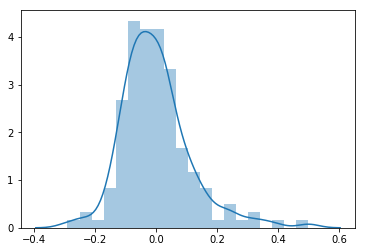

In [155]:
sns.distplot(residual, bins =20)

Error terms are normally distributed.

### Prediksi dengan Model Akhir

In [156]:
# data yang kita scaled di data_train juga kita scaled di data_test, sebagai berikut:
num_var= ['totalprice', 'toilets', 'garage', 'elevator']

df_test[num_var] = scaler.transform(df_test[num_var])

In [157]:
df_test.describe()

,row.labels,totalprice,area,age,floor,rooms,toilets,garage,elevator,tras
count,66.000000,66.000000,6.600000e+01,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,114.409091,0.286431,5.968689e+09,18.515152,4.560606,4.742424,0.409091,0.090909,0.803030,0.757576
std,63.224625,0.147928,3.509341e+09,10.998241,2.212752,0.589931,0.495434,0.213201,0.400757,0.431834
min,4.000000,0.032099,5.300000e+01,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,65.250000,0.179321,1.197250e+09,10.000000,3.000000,4.250000,0.000000,0.000000,1.000000,1.000000
50%,120.000000,0.261728,7.297000e+09,15.500000,4.000000,5.000000,0.000000,0.000000,1.000000,1.000000
75%,170.250000,0.360185,8.461750e+09,25.000000,6.000000,5.000000,1.000000,0.000000,1.000000,1.000000
max,215.000000,0.797531,9.985000e+09,59.000000,12.000000,7.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
y_test = df_test.pop('totalprice')
X_test = df_test

In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
X_test_sm = X_test_sm.drop(['zone','category','streetcategory','heating','out','conservation','row.labels', 'tras','floor','age','area','rooms'], axis =1)

In [161]:
y_pred = lr_3.predict(X_test_sm)

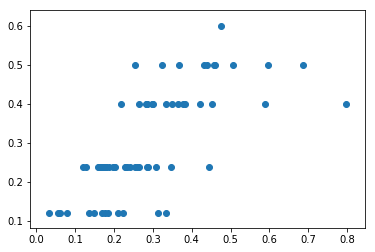

In [162]:
plt.scatter(y_test, y_pred)

In [165]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalprice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     72.41
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           7.03e-29
Time:                        16:51:10   Log-Likelihood:                 114.38
No. Observations:                 152   AIC:                            -220.8
Df Residuals:                     148   BIC:                            -208.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1206      0.021      5.808      0.000       0.080       0.162
toilets        0.1641      0.023      7.289      0.000       0.120       0.209
garage         0.2004      0.046      4.404      0.000       0.110       0.290
elevator       0.1159      0.027      4.373      0.000       0.064       0.168
==============================================================================
Omnibus:                       39.768   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.952
Skew:                           1.137   Prob(JB):                     3.57e-19
Kurtosis:                       5.871   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the equation of our best fitted line is:

𝑝𝑟𝑖𝑐𝑒=0.1641×toilet+0.1965×𝑏𝑎𝑡ℎ𝑟𝑜𝑜𝑚𝑠+0.11×𝑠𝑡𝑜𝑟𝑖𝑒𝑠+0.05×𝑚𝑎𝑖𝑛𝑟𝑜𝑎𝑑+0.03×𝑔𝑢𝑒𝑠𝑡𝑟𝑜𝑜𝑚+0.02×basement+ 0.086×ℎ𝑜𝑡𝑤𝑎𝑡𝑒𝑟ℎ𝑒𝑎𝑡𝑖𝑛𝑔+0.066×𝑎𝑖𝑟𝑐𝑜𝑛𝑑𝑖𝑡𝑖𝑜𝑛𝑖𝑛𝑔+0.0629×𝑝𝑎𝑟𝑘𝑖𝑛𝑔+0.0596×𝑝𝑟𝑒𝑓𝑎𝑟𝑒𝑎−0.0323×𝑢𝑛𝑓𝑢𝑟𝑛𝑖𝑠ℎ𝑒𝑑